# Confidence intervals

In [2]:
# import library
import pickle
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
plt.rcParams["figure.figsize"] = (10,10)

# open the file of interest, and use pickle loading
infile = open ("lab6/qcd_100000_pt_250_500.pkl",'rb') # signal dataset
qcd = pickle.load(infile)
infile = open ("lab6/higgs_100000_pt_250_500.pkl",'rb') # background dataset
higgs = pickle.load(infile)

# list all keys of the files
print(qcd.keys())
print(higgs.keys())
print(len(qcd))

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
100000


## Setup

100000
100000


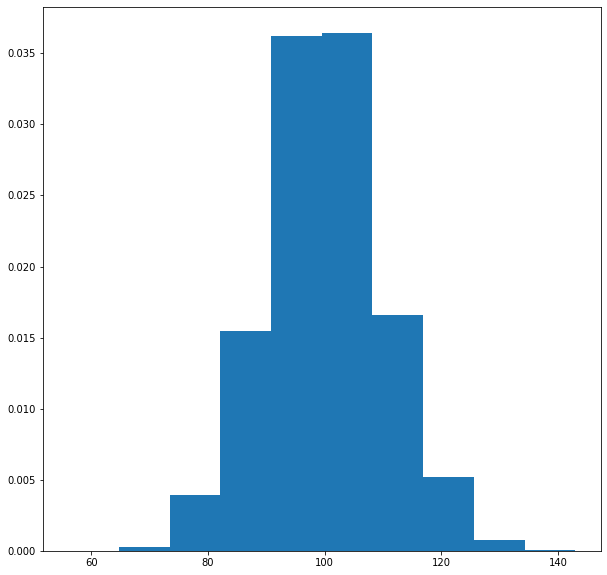

In [3]:
mu = 100
# print(higgs)
size = len(higgs['eta'])
print(size)
print(len(higgs['pt']))
simBG = stats.poisson.rvs(mu, size = size)
plt.hist(simBG, density=True)
plt.show()

## Problem 1

In [4]:
fiveSig = 1 - stats.norm.cdf(5)
print(fiveSig)
fiveSigPoint = stats.poisson.ppf(1 - fiveSig, mu)
print(fiveSigPoint)
print('The point of 5\u03C3 is ', fiveSigPoint)

2.866515719235352e-07
154.0
The point of 5σ is  154.0


## Problem 2

## Problem 3

## Problem 4